# Instantaneous planes from NREL5MW ALM case

In [1]:
# Add any possible locations of amr-wind-frontend here
amrwindfedirs = ['/projects/wind_uq/lcheung/amrwind-frontend/',
                  '/ccs/proj/cfd162/lcheung/amrwind-frontend/',
                ]
import sys, os, shutil, io
import numpy as np
for x in amrwindfedirs: sys.path.insert(1, x)

from functools import partial
import matplotlib.pyplot as plt

# Make all plots inline 
%matplotlib inline

import postproengine as ppeng

/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/ascldap/users/lcheung/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
# Load ruamel or pyyaml as needed
try:
    import ruamel.yaml
    yaml = ruamel.yaml.YAML(typ='unsafe', pure=True)
    useruamel=True
    loaderkwargs = {'Loader':yaml.RoundTripLoader}
    dumperkwargs = {'Dumper':yaml.RoundTripDumper, 'indent':4, 'default_flow_style':False}
    Loader=yaml.load
except:
    import yaml as yaml
    useruamel=False
    loaderkwargs = {}
    dumperkwargs = {'default_flow_style':False }
    Loader=yaml.safe_load
    
def stringReplaceDict(s, dreplace):
    outstr = str(s)
    for k, g in dreplace.items():
        outstr=outstr.replace(k, str(g))
    return outstr

def formatplot(fig, ax):
    #ax.set_xlim([-2, 10])
    #ax.set_ylim([-1.5,1.5])
    return

ppeng.formatplot = formatplot

In [3]:
replacedict={'RUNDIR':'/gpfs/lcheung/HFM/exawind-benchmarks/NREL5MW_ALM_RIGID_OFv402/',
            }

In [4]:
yamlstring="""

trange: &trange [15300, 15900]

globalattributes:
  verbose: False
#  udfmodules:
#  - testinterp.py  
  executeorder:
  - avgworkflow
  - instantaneousplanes
  

avgworkflow:
  avgplanes:
  - name: XYdomain
    ncfile:
    - RUNDIR/post_processing/XYdomain_090_30000.nc
    tavg: *trange
    #savepklfile:  avg_fixed_hhdomain.pkl         # Name of pickle file to save results (Optional, Default: '')
    #loadpklfile:  avg_fixed_hhdomain.pkl
    #group: T0_YZ_wake2              # Which group to pull from netcdf file (Optional, Default: None)
    contourplot:
      plotfunc: "lambda db: np.sqrt(db['velocityx_avg']**2 + db['velocityy_avg']**2)"
      title: 'NREL5MW RIGID AVG horizontal velocity'
      xaxis: x           # Which axis to use on the abscissa 
      yaxis: y           # Which axis to use on the ordinate 
      iplane: [0]
      clevels: np.linspace(0, 14, 141)
      cbar_nticks: 15
      savefile: '../results/images/XYdomain_AVG_15300_15900.png'
      
instantaneousplanes:
  - name: DomainXY
    ncfile: RUNDIR/post_processing/XYdomain_090_30000.nc
    iters:  []
    times: [15300, 15900]
    iplane: 0
    xaxis: x
    yaxis: y
    # --- optional stuff here ---
    plot:
      title: 'NREL5MW RIGID $U_h$ T={time:0.2f}'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      clevels: 'np.linspace(0, 14, 141)'
      xlabel: 'X [m]'
      ylabel: 'Y [m]'
      cbar_nticks: 15
      fontsize: 12
      figsize: [6,6]
      dpi: 125
      savefile: '../results/images/XYdomain_INST_{time:05.0f}.png'
      
  - name: Turb HH
    ncfile: RUNDIR/post_processing/turbhh_30000.nc
    iters:  []
    times: [15300, 15900]
    iplane: 0
    xaxis: a1
    yaxis: a2
    # --- optional stuff here ---
    plot:
      title: 'NREL5MW RIGID $U_h$ T={time:0.2f}'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      clevels: 'np.linspace(0, 14, 141)'
      xlabel: 'X/D'
      ylabel: 'Y/D'
      figsize: [12,4]
      cbar_nticks: 15
      fontsize: 12   
      xscalefunc: 'lambda x: (x-126*4)/126.0'
      yscalefunc: 'lambda y: (y-126*2)/126.0'
      savefile: '../results/images/turbineHH_INST_{time:05.0f}.png'

  - name: Turb SW
    ncfile: RUNDIR/post_processing/turbsw_30000.nc
    iters:  []
    times: [15300, 15900]
    iplane: 0
    xaxis: a1
    yaxis: a2
    # --- optional stuff here ---
    plot:
      title: 'NREL5MW RIGID $U_h$ T={time:0.2f}'
      plotfunc: "lambda db,i: np.sqrt(db['velocityx'][i]**2 + db['velocityy'][i]**2)"
      #plotfunc: "lambda db,i: db['velocityz'][i]"
      clevels: 'np.linspace(0, 14, 141)'
      #clevels: 'np.linspace(-2, 2, 21)'
      xlabel: 'X/D'
      ylabel: 'Z/D'
      figsize: [12,3]
      cbar_nticks: 11
      fontsize: 12   
      xscalefunc: 'lambda x: (x-126*4)/126.0'
      yscalefunc: 'lambda z: (z-90)/126.0'
      savefile: '../results/images/turbineSW_INST_{time:05.0f}.png'
"""
f = io.StringIO(stringReplaceDict(yamlstring, replacedict))
yamldict = Loader(f, **loaderkwargs)

Initialized avgplanes
Running avgplanes
/gpfs/lcheung/HFM/exawind-benchmarks/NREL5MW_ALM_RIGID_OFv402//post_processing/XYdomain_090_30000.nc 697
[============================================================] 100.0% 
Ncount = 697

Initialized contourplot inside avgplanes
Executing contourplot
Initialized instantaneousplanes
Running instantaneousplanes
extracting iter 348
extracting iter 1045
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 348
extracting iter 1045
Initialized plot inside instantaneousplanes
Executing plot
extracting iter 348
extracting iter 1045
Initialized plot inside instantaneousplanes
Executing plot


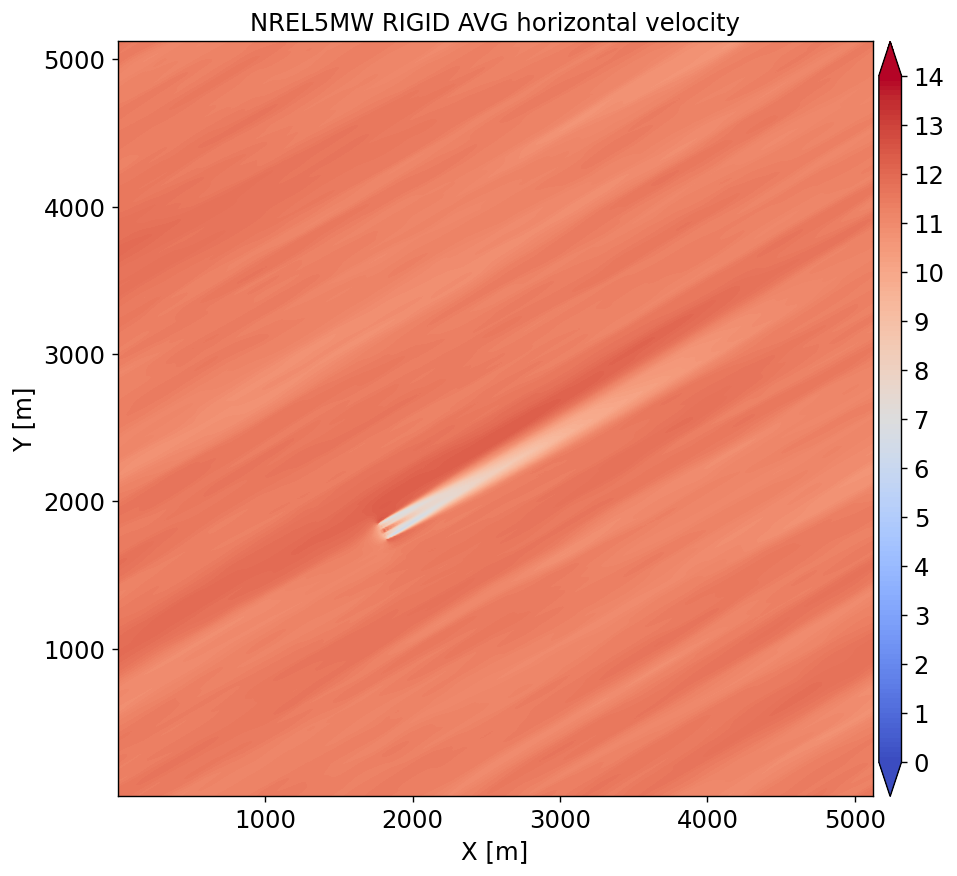

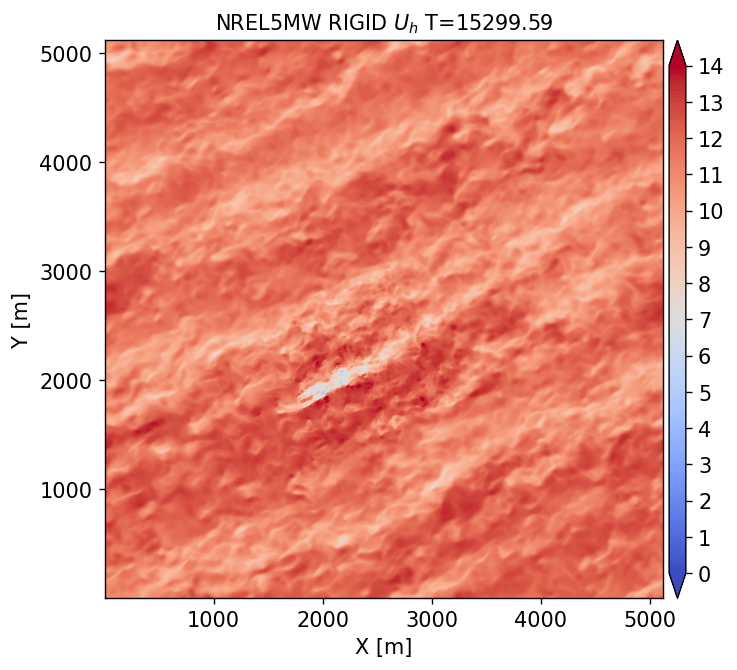

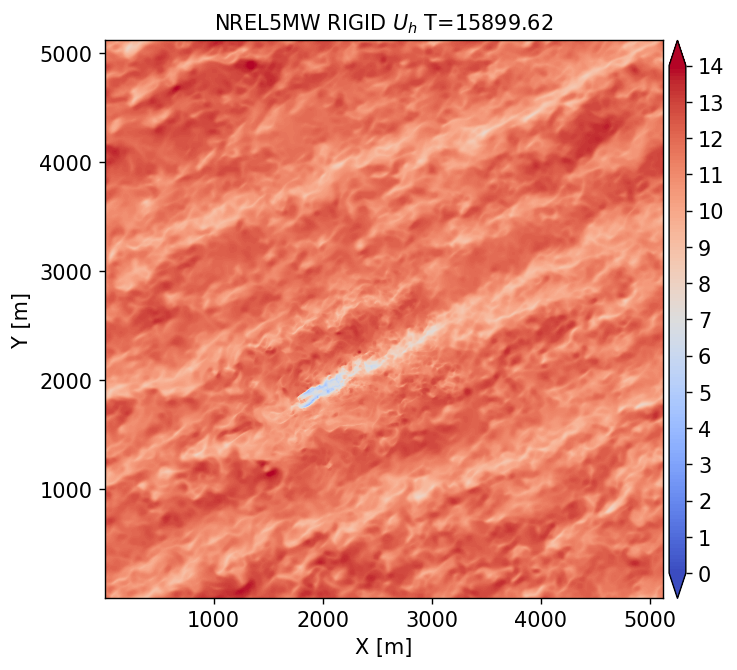

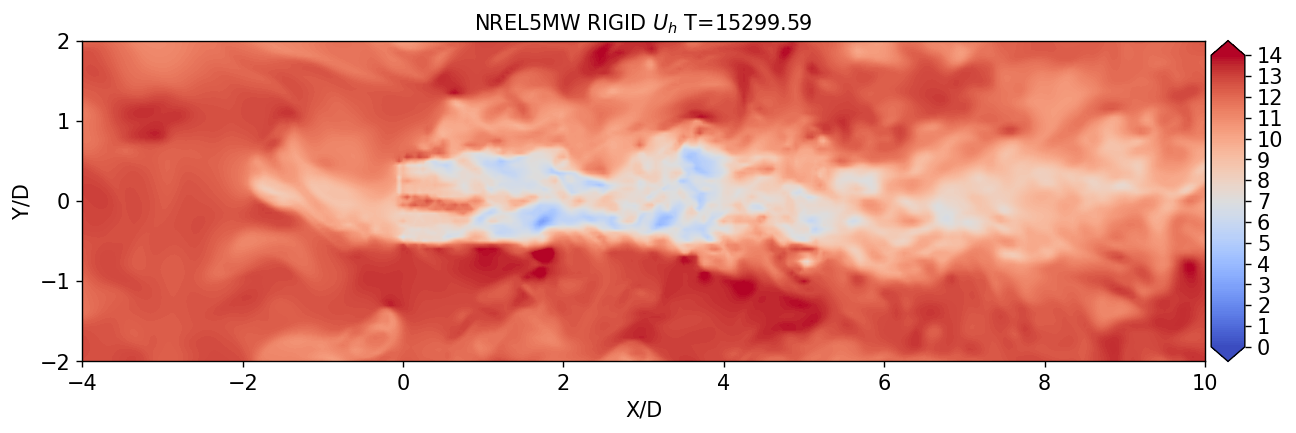

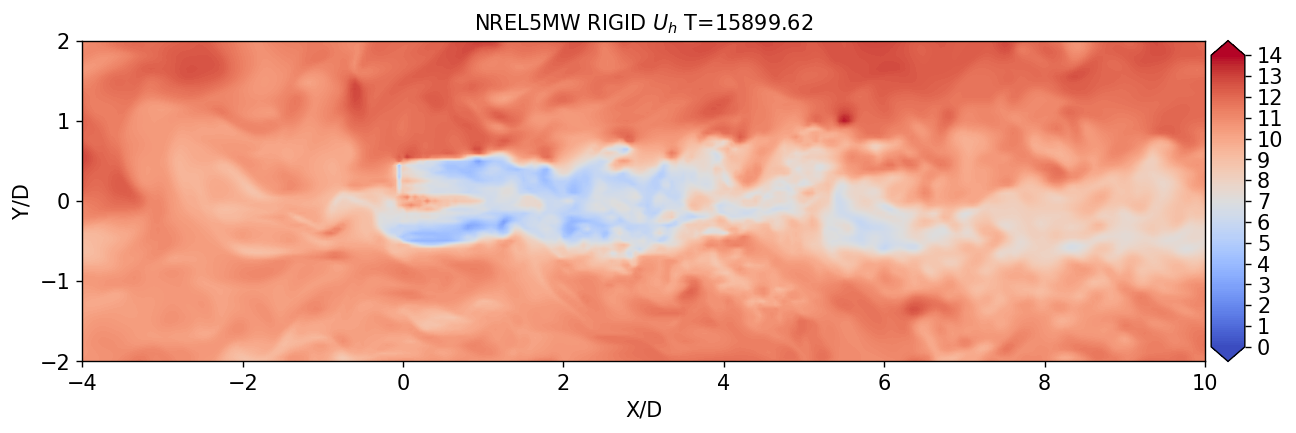

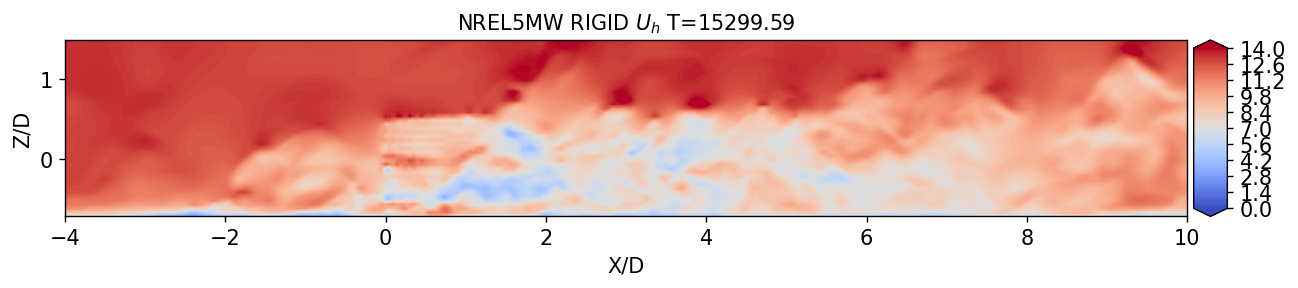

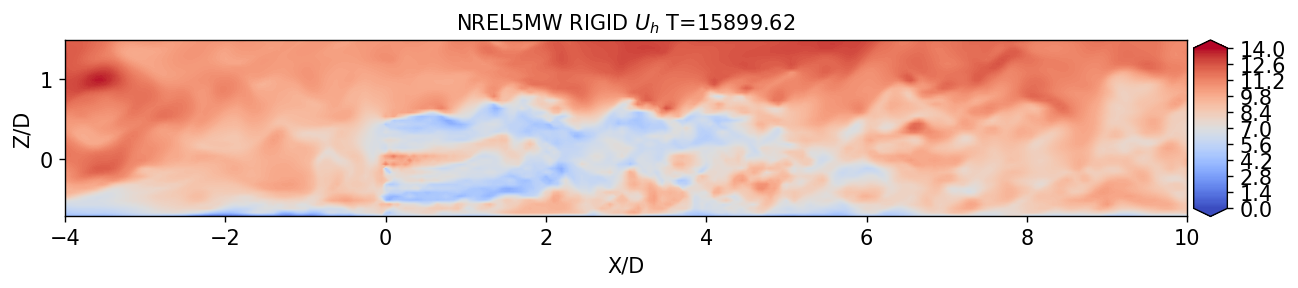

In [5]:
# Run the driver
ppeng.driver(yamldict, verbose=True)

In [6]:
# Write out the notebook to a python script
!jupyter nbconvert --to script InstantaneousAvgPlanes.ipynb
with open('InstantaneousAvgPlanes.py', 'r') as f:
    lines = f.readlines()
with open('InstantaneousAvgPlanes.py', 'w') as f:
    for line in lines:
        if "'matplotlib', 'inline'" in line: line = 'plt.show(block=False)'
        if 'nbconvert --to script' in line:
            break
        else:
            f.write(line)

[NbConvertApp] Converting notebook InstantaneousAvgPlanes.ipynb to script
[NbConvertApp] Writing 5016 bytes to InstantaneousAvgPlanes.py
